In [1]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice

In [2]:
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

#TODO: function that pairs up P2(trial n) and P1(trial n+1)

def combine_all_files(path):
    all_files = glob.glob(path + "/*.txt")
    df = pd.DataFrame()
    
    for filename in all_files:
        new_df = organize_trial_by_trial(filename)
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
    return df

In [3]:
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [4]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['s_g1','s_g2','j_g1','j_g2'])

In [5]:
#version is 's' for single player and 'j' for joint
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'j':
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [6]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    df_p1_g2 = df_p1_g2[20:]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [7]:
#needs work
def call_call_get_score(df, version):
    p1_g1 = df+'_'+'p1_'+'g1_'+'score'
    p1_g2 = df+'_'+'p1_'+'g2_'+'score'
    p2_g1 = df+'_'+'p2_'+'g1_'+'score'
    p2_g2 = df+'_'+'p2_'+'g2_'+'score'
    p1_g1, p1_g2, p2_g1, p2_g2 = call_get_score(df, version)
    return p1_g1, p1_g2, p2_g1, p2_g2

# Single Player Analysis

In [8]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s01_gamedata.csv')
s01 = df
s01_p1_g1_score,s01_p1_g2_score,s01_score_diff = call_get_score(s01, 's')
s01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,1,90,1,2.266084,13,20
41,1,21,2,1,90,1,2.224792,13,21
42,1,22,1,3,60,0,1.921934,13,21
43,1,22,2,1,90,1,2.059235,13,22
44,1,23,1,3,60,0,1.533652,13,22


In [9]:
#in the s files, p2 is the confederate
#NO SECOND GAME
df = organize_trial_by_trial('data/s02_gamedata.csv')
s02 = df
s02_p1_g1_score = get_score(s02, 1, 1)
s02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,60,1,1.584536,10,19
41,1,21,2,1,90,1,4.307226,10,20
42,1,22,1,3,90,1,3.392547,11,20
43,1,22,2,1,90,1,2.748121,11,21
44,1,23,1,3,90,1,2.159283,12,21


In [10]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s03_gamedata.csv')
s03 = df
s03_p1_g1_score,s03_p1_g2_score,s03_score_diff = call_get_score(s03, 's')
s03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,3,30,0,3.023223,11,19
41,1,21,2,1,90,1,4.216187,11,20
42,1,22,1,1,90,1,3.578478,12,20
43,1,22,2,1,90,1,3.353670,12,21
44,1,23,1,2,60,1,3.024833,13,21


In [11]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s05_gamedata.csv')
s05 = df
s05_p1_g1_score,s05_p1_g2_score,s05_score_diff = call_get_score(s05, 's')
s05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,3,90,1,2.520278,19,19
41,1,21,2,1,90,1,3.271920,19,20
42,1,22,1,3,90,1,2.473303,20,20
43,1,22,2,1,90,1,3.326063,20,21
44,1,23,1,3,90,1,2.590858,21,21


In [12]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s06_gamedata.csv')
s06 = df
s06_p1_g1_score,s06_p1_g2_score,s06_score_diff = call_get_score(s06, 's')
s06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,3,90,1,2.317366,19,19
41,1,21,2,1,90,1,2.632034,19,20
42,1,22,1,3,90,1,2.032146,20,20
43,1,22,2,1,90,1,2.798884,20,21
44,1,23,1,3,90,0,2.415234,20,21


In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s07_gamedata.csv')
s07 = df
s07_p1_g1_score,s07_p1_g2_score,s07_score_diff = call_get_score(s07, 's')
s07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,1,90,1,2.576466,12,19
41,1,21,2,1,90,1,2.650041,12,20
42,1,22,1,3,60,1,2.479496,13,20
43,1,22,2,1,90,1,2.697308,13,21
44,1,23,1,2,30,1,2.361975,14,21


In [14]:
pd.set_option('display.max_columns', None)  

In [15]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s08_gamedata.csv')
s08 = df
s08_p1_g1_score,s08_p1_g2_score,s08_score_diff = call_get_score(s08, 's')
s08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,90,0,2.287793,18,19
41,1,21,2,1,90,1,2.179205,18,20
42,1,22,1,2,90,1,2.191832,19,20
43,1,22,2,1,90,1,2.579180,19,21
44,1,23,1,2,90,1,1.927657,20,21


In [16]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s09_gamedata.csv')
s09 = df
s09_p1_g1_score,s09_p1_g2_score,s09_score_diff = call_get_score(s09, 's')
s09.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,30,0,2.387254,12,16
41,1,21,2,1,90,1,2.312562,12,17
42,1,22,1,2,30,0,2.267204,12,17
43,1,22,2,1,90,1,2.274282,12,18
44,1,23,1,1,90,1,2.121209,13,18


In [17]:
score_diff = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s08_score_diff, s09_score_diff]})

# Score diff between G1 and G2

In [18]:
score_diff

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s08,-10
6,s09,5


In [19]:
#increase in every participant except 1
#df excluding outliar
score_diff_ex = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s09_score_diff]})

In [20]:
score_diff_ex

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s09,5


In [21]:
score_diff_mean = score_diff['score_diff'].mean()

In [22]:
score_diff_ex_mean = score_diff_ex['score_diff'].mean()

In [23]:
score_diff_mean

5.428571428571429

In [24]:
score_diff_ex_mean

8.0

# Scores in G1 and G2

In [25]:
s_scores_1 = pd.DataFrame({'participant':['s01', 's02', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
     [s01_p1_g1_score, s02_p1_g1_score, s03_p1_g1_score, s05_p1_g1_score,
      s06_p1_g1_score, s07_p1_g1_score, s08_p1_g1_score, s09_p1_g1_score]})
s_scores_1.set_index('participant', inplace=True, drop=True)
s_scores_2 = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
    [s01_p1_g2_score, s03_p1_g2_score, s05_p1_g2_score, 
    s06_p1_g2_score, s07_p1_g2_score, s08_p1_g2_score, s09_p1_g2_score]})
s_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
s_scores_1

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65


In [26]:
s_scores_2

,score
participant,
s01,74
s03,71
s05,88
s06,87
s07,68
s08,80
s09,70


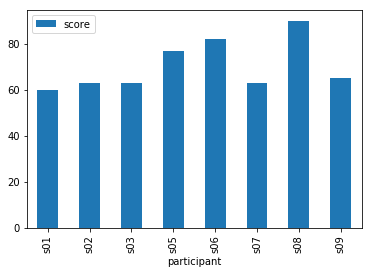

In [27]:
s_scores_1_bar = s_scores_1.plot.bar()

In [243]:
s_scores = pd.merge(s_scores_1, s_scores_2,on='participant')

In [244]:
s_scores

,score_x,score_y
participant,,
s01,60,74
s03,63,71
s05,77,88
s06,82,87
s07,63,68
s08,90,80
s09,65,70


In [29]:
s_scores.columns=['Game 1','Game 2']

([<matplotlib.axis.YTick at 0x1a1e354940>,
 <a list of 6 Text yticklabel objects>)

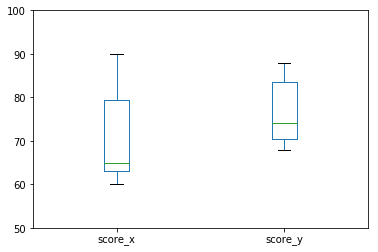

In [286]:
s_scores_box = s_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

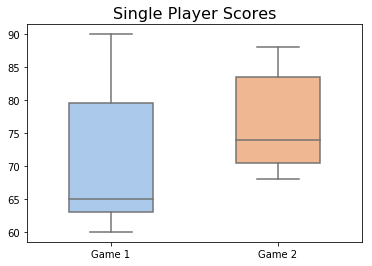

In [390]:
s_scores_box = sns.boxplot( 
                 data=s_scores, 
                 width=0.5,
                 palette="pastel")
s_scores_box.axes.set_title("Single Player Scores",
                    fontsize=16)

plot_file_name="s_score_box.jpg"
 
# save as jpeg
s_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

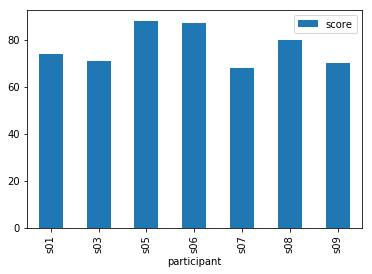

In [31]:
s_scores_2_bar = s_scores_2.plot.bar()

In [32]:
#combine g1 and g2 to one dataframe
s_combo = s_scores_1.append(s_scores_2)

In [33]:
'''s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'
                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':
     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,
      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,
      s09_p1_g1_score, s09_p1_g2_score]})
s_combo.set_index('participant', inplace=True, drop=True)'''

"s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'\n                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':\n     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,\n      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,\n      s09_p1_g1_score, s09_p1_g2_score]})\ns_combo.set_index('participant', inplace=True, drop=True)"

In [34]:

#new_index = ('s01_g1','s01_g2','s02_g1','s03_g1','s03_g2','s05_g1','s05_g2', 
                               #'s06_g1','s06_g2','s07_g1','s07_g2','s08_g1','s08_g2','s09_g1','s09_g2')
#s_combo.index = new_index

In [35]:
s_combo

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65
s01,74


In [36]:
s_combo = s_combo.sort_values(by=['participant'])

In [37]:
s_combo

,score
participant,
s01,60
s01,74
s02,63
s03,63
s03,71
s05,77
s05,88
s06,82
s06,87


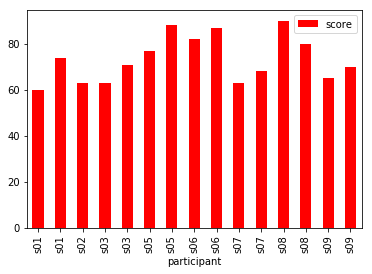

In [38]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(s_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
s_combo_bar = s_combo.plot(kind='bar',color=colors)

In [39]:
s_scores_1_mean = s_scores_1.mean()

In [40]:
s_scores_1_std = s_scores_1.std()

In [41]:
s_scores_2_mean = s_scores_2.mean()

In [42]:
s_scores_2_std = s_scores_1.std()

In [43]:
s_scores_2_std = s_scores_2.std()

In [44]:
#does everyone do better in the second game? 
#does the player that did better in the first game always do better in the second game?

In [45]:
#j_g1_scores = pd.DataFrame([j02_p1_g1_score, j02_p2_g1_score, j01_p1_g1_score, j01_p2_g1_score, j03_p1_g1_score, j03_p2_g1],index = ['j02_p1_g1_score', 'j02_p2_g1_score', 'jo1_p1_g1_score', 'j01_p2_g1_score', 'j03_p1_g1', 'j03_p2_g1'], columns=['score'])

In [46]:
s_list = [s01,s02,s03,s05,s06,s07,s08,s09]

In [47]:
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s02_p1_g1, s02_p1_g2 = separate_df(s02, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [48]:
s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s02_p1_g1_count = s02_p1_g1['probability'].value_counts(sort=False) #no second game
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)

In [49]:
s01_p1_g1_count

30    31
60    33
90    16
Name: probability, dtype: int64

In [50]:
s02_p1_g1_count

30    15
60    21
90    44
Name: probability, dtype: int64

In [51]:
s03_p1_g1_count

30    21
60    31
90    28
Name: probability, dtype: int64

In [52]:
s05_p1_g1_count

30    10
60    35
90    35
Name: probability, dtype: int64

In [53]:
s06_p1_g1_count

30    11
60    12
90    57
Name: probability, dtype: int64

In [54]:
s07_p1_g1_count

30    18
60    22
90    40
Name: probability, dtype: int64

In [55]:
s08_p1_g1_count

30     1
60     6
90    73
Name: probability, dtype: int64

In [56]:
s09_p1_g1_count

30    13
60    28
90    39
Name: probability, dtype: int64

In [57]:
s_g1_counts = pd.DataFrame([s01_p1_g1_count, s02_p1_g1_count, s03_p1_g1_count, 
                            s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, s08_p1_g1_count, s09_p1_g1_count],
                          index=['s01_p1_g1_count', 's02_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 's09_p1_g1_count'])

# Choices in G1 and G2

In [58]:
s_g1_counts

,30,60,90
s01_p1_g1_count,31,33,16
s02_p1_g1_count,15,21,44
s03_p1_g1_count,21,31,28
s05_p1_g1_count,10,35,35
s06_p1_g1_count,11,12,57
s07_p1_g1_count,18,22,40
s08_p1_g1_count,1,6,73
s09_p1_g1_count,13,28,39


In [321]:
s_g2_counts

,30,60,90
s01_p1_g2_count,31.0,13.0,36.0
s03_p1_g2_count,20.0,21.0,39.0
s05_p1_g2_count,NaN,NaN,80.0
s06_p1_g2_count,NaN,6.0,74.0
s07_p1_g2_count,13.0,22.0,45.0
s08_p1_g2_count,6.0,11.0,63.0
s09_p1_g2_count,8.0,31.0,41.0


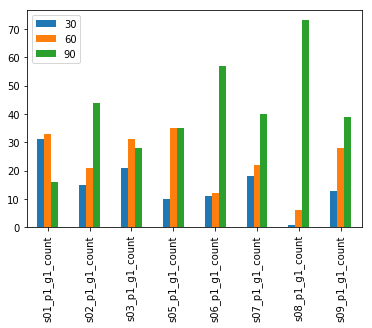

In [59]:
s_g1_counts_bar = s_g1_counts.plot.bar()

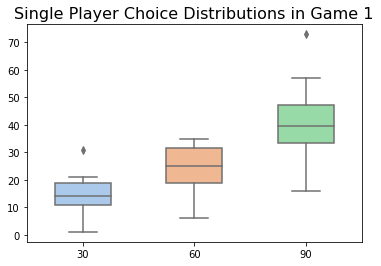

In [336]:
s_g1_counts_box = sns.boxplot( 
                 data=s_g1_counts, 
                 width=0.5,
                 palette="pastel")
s_g1_counts_box.axes.set_title("Single Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="s_g1_counts_box.jpg"
 
# save as jpeg
s_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [60]:
#make a value counts graph for hannah

In [61]:
s_g1_low = np.mean(s_g1_counts.iloc[:,0])

In [62]:
s_g1_med = np.mean(s_g1_counts.iloc[:,1])

In [63]:
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [64]:
s_g1_low_std = np.std(s_g1_counts.iloc[:,0])
s_g1_med_std = np.std(s_g1_counts.iloc[:,1])
s_g1_high_std = np.std(s_g1_counts.iloc[:,2])

In [65]:
s_g1_low

15.0

In [66]:
s_g1_med

23.5

In [67]:
s_g1_high

41.5

In [68]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count],
                          index=['s01_p1_g2_count', 's03_p1_g2_count', 's05_p1_g2_count', 's06_p1_g2_count', 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count'])

In [69]:
s_g2_counts

,30,60,90
s01_p1_g2_count,31.0,13.0,36.0
s03_p1_g2_count,20.0,21.0,39.0
s05_p1_g2_count,NaN,NaN,80.0
s06_p1_g2_count,NaN,6.0,74.0
s07_p1_g2_count,13.0,22.0,45.0
s08_p1_g2_count,6.0,11.0,63.0
s09_p1_g2_count,8.0,31.0,41.0


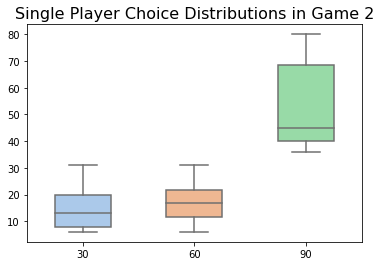

In [332]:
s_g2_counts_box = sns.boxplot( 
                 data=s_g2_counts, 
                 width=0.5,
                 palette="pastel")
s_g2_counts_box.axes.set_title("Single Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="s_g2_counts_box.jpg"
 
# save as jpeg
s_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [70]:
#CHANGE NaN to 0?

In [71]:
#maximizing and matching?

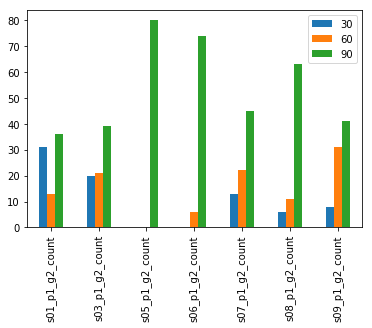

In [72]:
s_g2_counts_bar = s_g2_counts.plot.bar()

In [73]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [74]:
s_g2_low_std = np.std(s_g2_counts.iloc[:,0])
s_g2_med_std = np.std(s_g2_counts.iloc[:,1])
s_g2_high_std = np.std(s_g2_counts.iloc[:,2])

In [75]:
s_g2_low

15.6

In [76]:
s_g2_med

17.333333333333332

In [77]:
s_g2_high

54.0

In [372]:
s_scores_1_mean

score    70.375
dtype: float64

In [373]:
s_scores_2_mean

score    76.857143
dtype: float64

# Joint Analysis

In [78]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,30,0,2.786665,8,15
41,1,21,2,3,60,0,3.549299,8,15
42,1,22,1,1,90,1,4.862670,9,15
43,1,22,2,1,30,0,3.340400,9,15
44,1,23,1,2,30,0,2.940592,9,15


In [79]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,1,60,0,2.077004,8,13
41,1,21,2,3,90,1,2.407847,8,14
42,1,22,1,2,90,1,3.323409,9,14
43,1,22,2,3,90,1,2.757678,9,15
44,1,23,1,3,30,1,2.488808,10,15


In [80]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,3,30,0,2.794662,16,14
41,1,21,2,2,30,1,2.437832,16,15
42,1,22,1,3,30,1,3.307416,17,15
43,1,22,2,1,60,0,3.288425,17,15
44,1,23,1,3,30,0,7.878226,17,15


In [81]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,30,0,4.374907,13,11
41,1,21,2,1,30,0,2.654755,13,11
42,1,22,1,2,30,1,3.046506,14,11
43,1,22,2,1,30,0,3.540309,14,11
44,1,23,1,3,60,1,1.798136,15,11


In [82]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,90,1,1.921080,15,13
41,1,21,2,1,90,1,1.626224,15,14
42,1,22,1,2,90,1,2.057435,16,14
43,1,22,2,3,60,1,1.115467,16,15
44,1,23,1,2,90,1,1.794150,17,15


In [83]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,3,30,0,2.354874,11,17
41,1,21,2,1,30,0,2.015037,11,17
42,1,22,1,2,60,0,2.389857,11,17
43,1,22,2,1,30,0,2.072010,11,17
44,1,23,1,3,30,0,1.966060,11,17


In [84]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,60,1,3.402373,14,15
41,1,21,2,1,90,1,2.812654,14,16
42,1,22,1,3,90,1,2.610752,15,16
43,1,22,2,1,90,0,3.068534,15,16
44,1,23,1,2,60,1,2.519796,16,16


In [85]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
40,1,21,1,2,90,0,2.172961,14,14
41,1,21,2,2,30,0,1.880101,14,14
42,1,22,1,3,60,1,1.998044,15,14
43,1,22,2,3,60,0,2.267917,15,14
44,1,23,1,2,90,1,2.376997,16,14


# Scores in G1 and G2

In [375]:
j_scores_1 = pd.DataFrame({'participant':['j01_p1_g1_score','j01_p2_g1_score','j02_p1_g1_score','j02_p2_g1_score','j03_p1_g1_score','j03_p2_g1_score','j04_p1_g1_score',
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score','j07_p2_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [j01_p1_g1_score,j01_p2_g1_score,j02_p1_g1_score,j02_p2_g1_score,j03_p1_g1_score,j03_p2_g1_score,j04_p1_g1_score,
      j04_p2_g1_score,j05_p1_g1_score,j05_p2_g1_score,j06_p1_g1_score,j06_p2_g1_score,j07_p1_g1_score,j07_p2_g1_score,
      j08_p1_g1_score, j08_p2_g1_score]})
#j_scores_1.set_index('participant', inplace=True, drop=True)
j_scores_2 = pd.DataFrame({'participant':['j01_p1_g2_score','j01_p2_g2_score','j02_p1_g2_score','j02_p2_g2_score','j03_p1_g2_score','j03_p2_g2_score','j04_p1_g2_score',
      'j04_p2_g2_score','j05_p1_g2_score','j05_p2_g2_score','j06_p1_g2_score','j06_p2_g2_score','j07_p1_g2_score','j07_p2_g2_score',
      'j08_p1_g2_score', 'j08_p2_g2_score'], 'score':
     [j01_p1_g2_score,j01_p2_g2_score,j02_p1_g2_score,j02_p2_g2_score,j03_p1_g2_score,j03_p2_g2_score,j04_p1_g2_score,
      j04_p2_g2_score,j05_p1_g2_score,j05_p2_g2_score,j06_p1_g2_score,j06_p2_g2_score,j07_p1_g2_score,j07_p2_g2_score,
      j08_p1_g2_score, j08_p2_g2_score]})
#j_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
j_scores_1

,participant,score
0,j01_p1_g1_score,57
1,j01_p2_g1_score,61
2,j02_p1_g1_score,54
3,j02_p2_g1_score,68
4,j03_p1_g1_score,69
5,j03_p2_g1_score,67
6,j04_p1_g1_score,64
7,j04_p2_g1_score,56
8,j05_p1_g1_score,77
9,j05_p2_g1_score,70


In [376]:
j_scores_2

,participant,score
0,j01_p1_g2_score,73
1,j01_p2_g2_score,60
2,j02_p1_g2_score,72
3,j02_p2_g2_score,76
4,j03_p1_g2_score,82
5,j03_p2_g2_score,75
6,j04_p1_g2_score,60
7,j04_p2_g2_score,54
8,j05_p1_g2_score,70
9,j05_p2_g2_score,78


In [377]:
#j_scroes = j_scores_1.merge(j_scores_2, how='outer', left_index=True, right_index=True)
j_scores = pd.concat([j_scores_1,j_scores_2],axis=1,sort=False)

In [378]:
j_scores

,participant,score,participant,score
0,j01_p1_g1_score,57,j01_p1_g2_score,73
1,j01_p2_g1_score,61,j01_p2_g2_score,60
2,j02_p1_g1_score,54,j02_p1_g2_score,72
3,j02_p2_g1_score,68,j02_p2_g2_score,76
4,j03_p1_g1_score,69,j03_p1_g2_score,82
5,j03_p2_g1_score,67,j03_p2_g2_score,75
6,j04_p1_g1_score,64,j04_p1_g2_score,60
7,j04_p2_g1_score,56,j04_p2_g2_score,54
8,j05_p1_g1_score,77,j05_p1_g2_score,70
9,j05_p2_g1_score,70,j05_p2_g2_score,78


In [379]:
j_scores = j_scores.drop(columns="participant")

In [385]:
j_scores_med = j_scores.median()
s_scores_med = s_scores.median()

In [387]:
j_scores_med

Game 1    62.5
Game 2    74.5
dtype: float64

In [388]:
s_scores_med

Game 1    65.0
Game 2    74.0
dtype: float64

In [380]:
j_scores.columns=['Game 1','Game 2']

In [381]:
import seaborn as sns

([<matplotlib.axis.YTick at 0x1a200a6c18>,
 <a list of 6 Text yticklabel objects>)

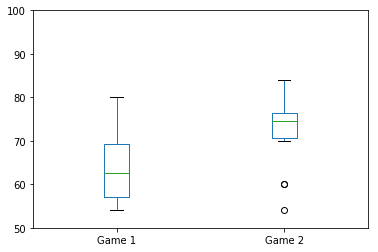

In [382]:
j_scores_box = j_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

([<matplotlib.axis.YTick at 0x1a1fb4a9b0>,
 <a list of 6 Text yticklabel objects>)

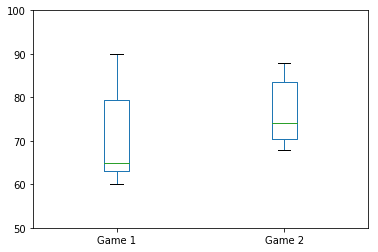

In [389]:
s_scores_box = s_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

Text(0.5, 1.0, 'Multiplayer Scores')

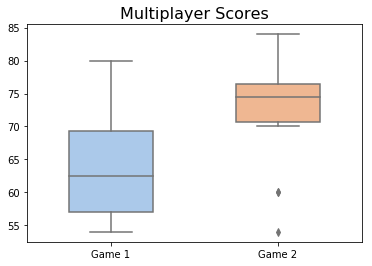

In [383]:
j_scores_box = sns.boxplot( 
                 data=j_scores, 
                 width=0.5,
                 palette="pastel")
j_scores_box.axes.set_title("Multiplayer Scores",
                    fontsize=16)


In [305]:
plot_file_name="j_score_box.jpg"
 
# save as jpeg
j_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)


In [274]:
j_scores_1_mean = j_scores_1.mean()

In [275]:
j_scores_1_std = j_scores_1.std()

In [276]:
j_scores_2_mean = j_scores_2.mean()

In [369]:
j_scores_1_mean

score    64.3125
dtype: float64

In [370]:
j_scores_2_mean

score    72.6875
dtype: float64

In [277]:
j_scores_2_std = j_scores_2.std()

In [284]:
j_scores_1_std

score    8.187134
dtype: float64

In [94]:
#combine g1 and g2 to one dataframe
j_combo = j_scores_1.append(j_scores_2)

In [95]:
j_combo

,score
participant,
j01_p1_g1_score,57
j01_p2_g1_score,61
j02_p1_g1_score,54
j02_p2_g1_score,68
j03_p1_g1_score,69
j03_p2_g1_score,67
j04_p1_g1_score,64
j04_p2_g1_score,56
j05_p1_g1_score,77


In [96]:
j_combo = j_combo.sort_values(by=['participant'])

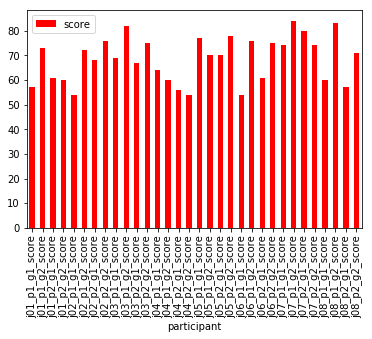

In [97]:
j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [98]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [99]:
j_score_diff

,participant,score_diff
0,j01_p1,16
1,j01_p2,-1
2,j02_p1,18
3,j02_p2,8
4,j03_p1,13
5,j03_p2,8
6,j04_p1,-4
7,j04_p2,-2
8,j05_p1,-7
9,j05_p2,8


In [100]:
#impairs learning?

In [101]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [102]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [103]:
j_score_diff_mean

8.375

In [104]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


# Choice Distributions

In [105]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)

In [106]:
j01_p1_g1_count

30    31
60    30
90    19
Name: probability, dtype: int64

In [107]:
j01_p1_g2_count

30    13
60    22
90    45
Name: probability, dtype: int64

In [108]:
j01_p2_g1_count

30    28
60    29
90    23
Name: probability, dtype: int64

In [109]:
j01_p2_g2_count

30    26
60    37
90    37
Name: probability, dtype: int64

In [110]:
j02_p1_g1_count

30    27
60    25
90    28
Name: probability, dtype: int64

In [111]:
j02_p1_g2_count

30    20
60    25
90    35
Name: probability, dtype: int64

In [112]:
j02_p2_g1_count

30    17
60    32
90    31
Name: probability, dtype: int64

In [113]:
j02_p2_g2_count

30     9
60    26
90    65
Name: probability, dtype: int64

In [114]:
j03_p1_g1_count

30    16
60    22
90    42
Name: probability, dtype: int64

In [115]:
j03_p1_g2_count

30     3
60    17
90    60
Name: probability, dtype: int64

In [116]:
j03_p2_g1_count

30    23
60    15
90    42
Name: probability, dtype: int64

In [117]:
j03_p2_g2_count

30    10
60     7
90    83
Name: probability, dtype: int64

In [118]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, 
                            j03_p1_g1_count, j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count,
                           j05_p1_g1_count,j05_p2_g1_count, j06_p1_g1_count, j06_p2_g1_count, j07_p1_g1_count, 
                            j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count],
                          index=['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                            'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count',
                           'j05_p1_g1_count','j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                            'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count'])

In [322]:
j_g1_counts

,30,60,90
j01_p1_g1_count,31,30,19
j01_p2_g1_count,28,29,23
j02_p1_g1_count,27,25,28
j02_p2_g1_count,17,32,31
j03_p1_g1_count,16,22,42
j03_p2_g1_count,23,15,42
j04_p1_g1_count,20,31,29
j04_p2_g1_count,24,22,34
j05_p1_g1_count,3,11,66
j05_p2_g1_count,11,20,49


In [120]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

j_g1_low_std = np.std(j_g1_counts.iloc[:,0])
j_g1_med_std = np.std(j_g1_counts.iloc[:,1])
j_g1_high_std = np.std(j_g1_counts.iloc[:,2])

In [121]:
j_g1_low

22.8125

In [122]:
j_g1_med

23.0625

In [123]:
j_g1_high

34.125

In [124]:
#social matching

In [125]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [126]:
j_g2_counts

,30,60,90
j01_p1_g2_count,13,22,45
j01_p2_g2_count,26,37,37
j02_p1_g2_count,20,25,35
j02_p2_g2_count,9,26,65
j03_p1_g2_count,3,17,60
j03_p2_g2_count,10,7,83
j04_p1_g2_count,33,26,21
j04_p2_g2_count,40,40,20
j05_p1_g2_count,12,9,59
j05_p2_g2_count,7,40,53


In [127]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [128]:
j_g2_low

13.625

In [129]:
j_g2_med

23.5625

In [130]:
j_g2_high

52.8125

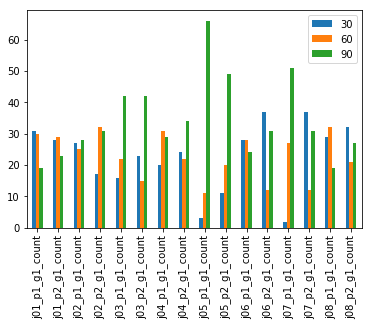

In [131]:
j_g1_counts_bar = j_g1_counts.plot.bar()

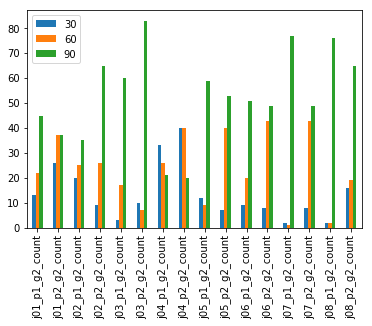

In [132]:
j_g2_counts_bar = j_g2_counts.plot.bar()

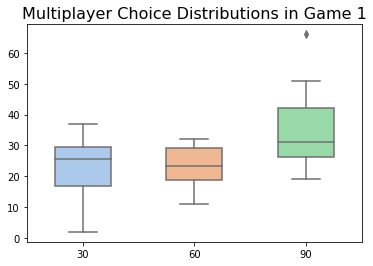

In [338]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="j_g1_counts_box.jpg"
 
# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

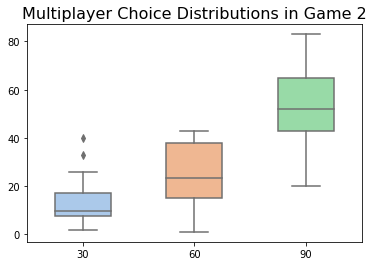

In [337]:
j_g2_counts_box = sns.boxplot( 
                 data=j_g2_counts, 
                 width=0.5,
                 palette="pastel")
j_g2_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="j_g2_counts_box.jpg"
 
# save as jpeg
j_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [133]:
hannah_counts = pd.DataFrame([s08_p1_g1_count,s08_p1_g2_count,s09_p1_g1_count,s09_p1_g2_count,j01_p1_g1_count,
                              j01_p1_g2_count,j01_p2_g1_count,j01_p2_g2_count,j05_p1_g1_count,j05_p1_g2_count,j05_p1_g1_count,
                              j05_p2_g2_count],
                          index=['s08 Game 1','s08 Game 2','s09 Game 1','s09 Game 2','j01_1 Game 1','j01_1 Game 2',
                                'j01_2 Game 1','j01_2 Game 2','j05_1 Game 1','j05_1 Game 2','j05_2 Game 1','j05_2 Game 2'])

In [134]:
hannah_counts

,30,60,90
s08 Game 1,1,6,73
s08 Game 2,6,11,63
s09 Game 1,13,28,39
s09 Game 2,8,31,41
j01_1 Game 1,31,30,19
j01_1 Game 2,13,22,45
j01_2 Game 1,28,29,23
j01_2 Game 2,26,37,37
j05_1 Game 1,3,11,66
j05_1 Game 2,12,9,59


In [135]:
hannah_counts.to_pickle('hannah_counts_table.pkl')

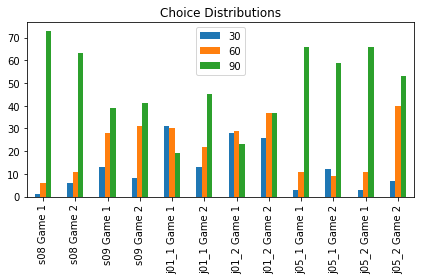

In [136]:
hannah_counts_bar = hannah_counts.plot.bar(title='Choice Distributions')
plt.tight_layout()
plt.savefig('hannah_counts.eps',format='eps',dpi=1000)

# Combined Tables

In [137]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]},index = ['s_1','s_2',
                                                                                                     'j_1', 'j_2'])

In [138]:
s_scores_1_mean

score    70.375
dtype: float64

In [139]:
pd.to_numeric(s_scores_1_mean)

score    70.375
dtype: float64

In [140]:
scores_df

,score,std
s_1,score 70.375 dtype: float64,score 11.109038 dtype: float64
s_2,score 76.857143 dtype: float64,score 8.214389 dtype: float64
j_1,score 64.3125 dtype: float64,score 8.187134 dtype: float64
j_2,score 72.6875 dtype: float64,score 8.42788 dtype: float64


In [141]:
counts_df = pd.DataFrame({'low':[s_g1_low,s_g2_low,j_g1_low,j_g2_low],'medium':[s_g1_med,s_g2_med,j_g1_med,j_g2_med],
                          'high':[s_g1_high,s_g2_high,j_g1_high,j_g2_high]},index = ['s_1','s_2','j_1', 'j_2'])
#add standard deviations

In [142]:
counts_df

,low,medium,high
s_1,15.0000,23.500000,41.5000
s_2,15.6000,17.333333,54.0000
j_1,22.8125,23.062500,34.1250
j_2,13.6250,23.562500,52.8125


In [143]:
#j learn to favor medium over the low in game 2

In [144]:
counts_std_df = pd.DataFrame({'low':[s_g1_low_std,s_g2_low_std,j_g1_low_std,j_g2_low_std],'medium':[s_g1_med_std,s_g2_med_std,j_g1_med_std,j_g2_med_std],
                          'high':[s_g1_high_std,s_g2_high_std,j_g1_high_std,j_g2_high_std]},index = ['s_1','s_2','j_1', 'j_2'])

In [145]:
counts_std_df

,low,medium,high
s_1,8.231039,9.656604,16.286497
s_2,9.090655,8.259674,16.716117
j_1,10.363510,7.163002,12.434202
j_2,10.664632,13.761217,17.976439


In [146]:
#high deviations in high and med in game 2
#evidence of 2 subgroups?

# Maximizing/Matching

In [147]:
scores

,s_g1,s_g2,j_g1,j_g2


In [148]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [149]:
#are ppl using a strategy similar to their partner's?
#calls jsd for p1 and p2 and for p1 and p2 with the mean
def compare_strat(p1,p2):
    strat = jsd(p1,p2)
    comp_1 = jsd(p1,[j_g1_low,j_g1_med,j_g1_high])
    comp_2 = jsd(p2,[j_g1_low,j_g1_med,j_g1_high])
    return strat, comp_1, comp_2

In [150]:
#jsd_1_strat

In [151]:
#jsd_1_comp

In [152]:
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [153]:
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [154]:
social_max = [0, 100, 0]
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [155]:
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [156]:
s01_p1_g1_count

30    31
60    33
90    16
Name: probability, dtype: int64

In [157]:
from scipy import stats

In [158]:
#test = jsd(maximize,match)

In [159]:
#test

In [160]:
s01 = 'match'

In [161]:
s05_p1_g2_count

90    80
Name: probability, dtype: int64

In [162]:
s05_p1_g2_count = [11,0,89]

In [163]:
s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s02_g1_max,s02_g1_match = call_jsd(s02_p1_g1_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd([0,6,74])
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)

In [164]:
s06_p1_g2_count

60     6
90    74
Name: probability, dtype: int64

In [165]:
s_jsd_g1 = pd.DataFrame({'max':[s01_g1_max,s02_g1_max,s03_g1_max,s05_g1_max,s06_g1_max,s07_g1_max,s08_g1_max,
                                s09_g1_max],
                      'match':[s01_g1_match,s02_g1_match,s03_g1_match,s05_g1_match
                               ,s06_g1_match,s07_g1_match,s08_g1_match,s09_g1_match]},
                        index=['s01', 's02', 's03','s05','s06','s07','s08','s09'])

In [166]:
s_jsd_g2 = pd.DataFrame({'max':[s01_g2_max,s03_g2_max,s05_g2_max,s06_g2_max,s07_g2_max,s08_g2_max,
                                s09_g2_max],
                      'match':[s01_g2_match,s03_g2_match,s05_g2_match
                               ,s06_g2_match,s07_g2_match,s08_g2_match,s09_g2_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09'])

In [167]:
#NOT WORKING
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        if social == True:
            if num >= jsd(social_max,social_match):
                types = types.append({'type' : 'neither'},ignore_index=True)
        else:
            if num >= jsd(maximize,match):
                types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [168]:
#s_jsd.apply(check_type,axis=1)

In [169]:
s_types_g1 = check_type(s_jsd_g1)

s01 0.4228104552401625 0.05793497802605687
matchi
s02 0.18909443388050434 0.0030121861314518564
matchi
s03 0.30685770886869845 0.013066262687201312
matchi
s05 0.25147291908660935 0.006065572177275259
matchi
s06 0.11176384432261273 0.027887066868293092
matchi
s07 0.21576155433883565 0.0035806405380673263
matchi
s08 0.03132635558932316 0.11413280790109236
maxi
s09 0.2226805511392874 0.00015438011922900424
matchi


In [170]:
s_types_g2 = check_type(s_jsd_g1)

s01 0.4228104552401625 0.05793497802605687
matchi
s02 0.18909443388050434 0.0030121861314518564
matchi
s03 0.30685770886869845 0.013066262687201312
matchi
s05 0.25147291908660935 0.006065572177275259
matchi
s06 0.11176384432261273 0.027887066868293092
matchi
s07 0.21576155433883565 0.0035806405380673263
matchi
s08 0.03132635558932316 0.11413280790109236
maxi
s09 0.2226805511392874 0.00015438011922900424
matchi


In [171]:
s_types_g1.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,maxi
8,matchi


In [172]:
s_types_g2.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,maxi
8,matchi


In [173]:
threshold = jsd(maximize,match)

In [174]:
threshold

0.21576155433883576

In [175]:
s_jsd_g1

,max,match
s01,0.422810,0.057935
s02,0.189094,0.003012
s03,0.306858,0.013066
s05,0.251473,0.006066
s06,0.111764,0.027887
s07,0.215762,0.003581
s08,0.031326,0.114133
s09,0.222681,0.000154


In [176]:
s_jsd_g2

,max,match
s01,0.244099,0.038302
s03,0.222681,0.006345
s05,0.039725,0.146174
s06,0.026724,0.134085
s07,0.182664,0.002333
s08,0.079977,0.046095
s09,0.208947,0.005268


In [177]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd(j08_p2_g2_count)

In [178]:
j_jsd_g1 = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [179]:
j_jsd_g2 = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [180]:
j_types_g1 = check_type(j_jsd_g1)

j01 0.39058221940212334 0.04711424829797456
matchi
j01 0.3512810052638734 0.03144346735247976
matchi
j02 0.3068577088686985 0.021582370841057137
matchi
j02 0.28225894160545145 0.0064804619548694195
matchi
j03 0.20223272608716225 0.0023116296488244897
matchi
j03 0.20223272608716222 0.018633232726506604
matchi
j04 0.2985021223133303 0.010716964599497024
matchi
j04 0.25897071489674234 0.012580304393477631
matchi
j05 0.06485203667392961 0.06320260353544513
matchi
j05 0.15780671317666733 0.00653564186933259
matchi
j06 0.3420144880071857 0.02935839122581814
matchi
j06 0.2822589416054515 0.05758813106443683
matchi
j07 0.14586210995682214 0.03349062077390598
matchi
j07 0.2822589416054515 0.05758813106443683
matchi
j08 0.39058221940212334 0.043951820706237654
matchi
j08 0.31537868598871693 0.03479193188747845
matchi


In [181]:
j_types_g2 = check_type(j_jsd_g2)

j01 0.18266421587736578 0.002333387236177256
matchi
j01 0.2935651532009069 0.01049833039560729
matchi
j02 0.25147291908660935 0.00540537820602017
matchi
j02 0.1400031203020941 0.012990426323189502
matchi
j03 0.09560258894703257 0.04140112504720802
matchi
j03 0.06287129593967887 0.07161673842036505
maxi
j04 0.37045924159204036 0.045764058865540434
matchi
j04 0.4228104552401625 0.05947347895817765
matchi
j05 0.10092820092983168 0.04027683374917705
matchi
j05 0.19957462078009014 0.011901222951366624
matchi
j06 0.14586210995682214 0.009796023082461316
matchi
j06 0.22128824866172742 0.01087142122111897
matchi
j07 0.013175660665944238 0.15948877173095694
maxi
j07 0.22128824866172742 0.01087142122111897
matchi
j08 0.01764922746459481 0.1436688481158736
maxi
j08 0.1400031203020941 0.014880046342468645
matchi


In [182]:
j_types_g1.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,matchi
8,matchi
9,matchi
10,matchi


In [183]:
j_types_g2.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,maxi
7,matchi
8,matchi
9,matchi
10,matchi


In [184]:
j_jsd_g1

,max,match
j01,0.390582,0.047114
j01,0.351281,0.031443
j02,0.306858,0.021582
j02,0.282259,0.006480
j03,0.202233,0.002312
j03,0.202233,0.018633
j04,0.298502,0.010717
j04,0.258971,0.012580
j05,0.064852,0.063203
j05,0.157807,0.006536


In [320]:
j_jsd_g2

,max,match
j01,0.182664,0.002333
j01,0.293565,0.010498
j02,0.251473,0.005405
j02,0.140003,0.012990
j03,0.095603,0.041401
j03,0.062871,0.071617
j04,0.370459,0.045764
j04,0.422810,0.059473
j05,0.100928,0.040277
j05,0.199575,0.011901


In [185]:
#same for joint using "social"

In [186]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd_social(j08_p2_g2_count)

In [187]:
j_jsd_g1_social = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [188]:
j_jsd_g2_social = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [189]:
#j_types_social = check_type(j_jsd_social,True)

In [190]:
#j_types_social.drop([0])

In [191]:
#j_jsd_social.drop([0])

In [192]:
#issue

In [193]:
j_jsd_g1_social

,max,match
j01,0.290305,0.005673
j01,0.298502,0.001254
j02,0.332948,0.000276
j02,0.274358,0.009279
j03,0.360759,0.020614
j03,0.434176,0.021983
j04,0.282259,0.004311
j04,0.360759,0.004616
j05,0.483464,0.142649
j05,0.380396,0.044891


In [194]:
threshold

0.21576155433883576

In [195]:
j_jsd_g2_social

,max,match
j01,0.360759,0.031241
j01,0.293565,0.003228
j02,0.332948,0.006684
j02,0.372427,0.065430
j03,0.411771,0.115647
j03,0.563876,0.134610
j04,0.324073,0.004241
j04,0.274358,0.011457
j05,0.510950,0.085517
j05,0.274358,0.059537


In [196]:
import matplotlib.lines as mlines

In [197]:
#colors_jsd = [['lightcoral','red','lightcoral','red','bisque','orange','bisque','orange','palegreen','green','palegreen','green',
              #'lightblue','blue','lightblue','blue','mediumslateblue','indigo','mediumslateblue','indigo','lightpink','deeppink',
              #'lightpink','deeppink','yellow','gold','yellow','gold','lightgray','gray','lightgray','gray']              

In [198]:
import itertools

In [199]:
colors_jsd_j = ['red','lightcoral','orange','darkorange','green','palegreen',
              'blue','darkblue','hotpink','pink','purple','plum','peru','saddlebrown','gray','lightgray']
colors_jsd_s_g1 = ['red','orange','green','blue','pink','purple','peru','cyan']
colors_jsd_s_g2 = ['red','green','blue','pink','purple','peru','cyan']
markers_jsd = ['o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v'
          'o','v','o','v','o','v','o','v']
colors

['red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue']

In [391]:
s_jsd_g1.mean()

max      0.218971
match    0.028229
dtype: float64

In [392]:
j_jsd_g1.mean()

max      0.267121
match    0.029836
dtype: float64

In [393]:
s_jsd_g2.mean()

max      0.143545
match    0.054086
dtype: float64

In [394]:
j_jsd_g2.mean()

max      0.179951
match    0.040702
dtype: float64

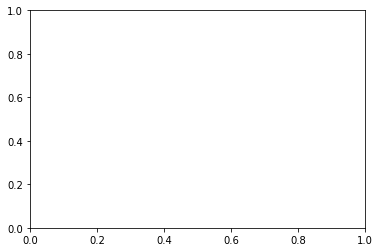

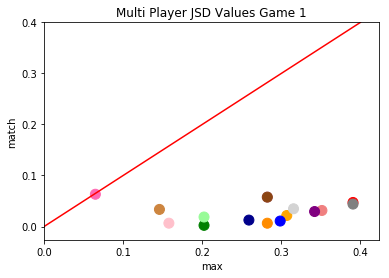

In [343]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multi Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()




#color code pairs together

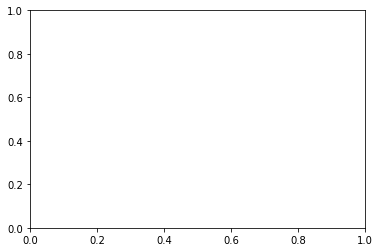

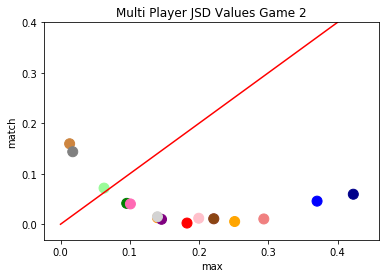

In [359]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_g2_plot = plt.subplots()
j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multi Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g2_plot.add_line(line1)
#j_jsd_g2_plot.add_line(line2)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()


#color code pairs together

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


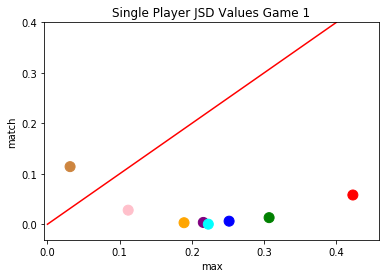

In [345]:
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g1,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


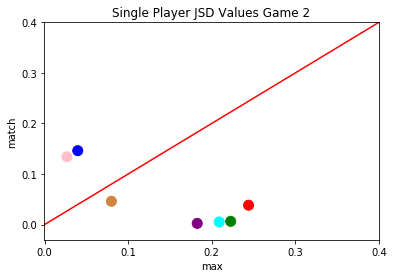

In [346]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g2_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('s_jsd_2.eps',format='eps',dpi=1000)

In [204]:
threshold_social = jsd(social_max,social_match)

In [205]:
threshold_social

0.3182570841474063

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


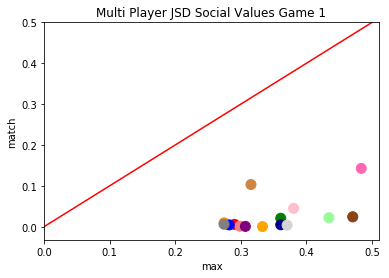

In [366]:
j_jsd_g1_social_plot = j_jsd_g1_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 1')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
#line1 = mlines.Line2D([0.3183, 0.3183],[-0.03, 0.55], color='red')
#line2 = mlines.Line2D([0, 0.8],[0.3183, 0.3183])
#j_jsd_g1_social_plot.add_line(line1)
#j_jsd_g1_social_plot.add_line(line2)

line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g1_social_plot.add_line(line1)
plt.savefig('j_jsd_social_1.eps',format='eps',dpi=1000)
#everyone could be classified as a matcher. everyone to the left of the red line could be using both
#NEED TO: color differently those who were more of maximizers than matchers!!!

/Users/baryosef/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


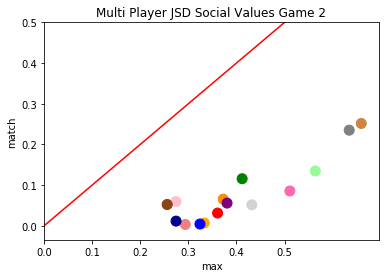

In [368]:
j_jsd_g2_social_plot = j_jsd_g2_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 2')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g2_social_plot.add_line(line1)
plt.savefig('j_jsd_social_2.eps',format='eps',dpi=1000)

### NOT WORKING
def check_type_3(row):
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            row['type'] = 'max'
            num = maxi
        elif matchi < maxi:
            row['type'] = 'match'
            num = matchi
        else:
            row['type'] = 'neither'
        if num >= jsd(maximize,match):
            row['type'] = 'neither'
            
def check_type_2(df):
    for row in df.itertuples(index=True, name='Pandas'):
        print(index,row["max"],row["match"])
        if row["match"] < row["max"] and row["match"] < jsd(maximize,match):
            df.at[index,'type'] = 'match'
        elif row["max"] < row["match"] and row["max"] < jsd(maximize,match):
            df.at[index,'type'] = 'max'
        else:
            df.at[index,'type'] = 'neither'

In [357]:
match = pd.DataFrame([0,0,100])
#match = pd.DataFrame(0],'60':[0],'90':[100]})

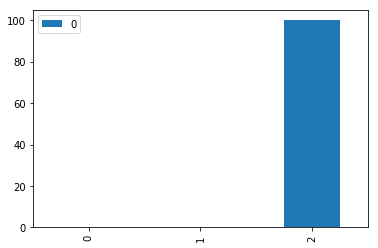

In [358]:
match.plot.bar()
